In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
#getting the training dataset
data_train = pd.read_csv("dataset/Google_Stock_Price_Train.csv")
#displaying first 5 rows of the training dataset
print(f"The first 5 rows of Training dataset:\n\n {data_train.head(5)}\n\n")

#getting the testing dataset
data_test = pd.read_csv("dataset/Google_Stock_Price_Test.csv")

#displaying first 5 rows of the testing dataset
print(f"The first 5 rows of Testing dataset:\n\n {data_test.head(5)}\n\n")

The first 5 rows of Training dataset:

        Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


The first 5 rows of Testing dataset:

        Date    Open    High     Low   Close     Volume
0  1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1  1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2  1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3  1/6/2017  795.26  807.90  792.20  806.15  1,640,200
4  1/9/2017  806.40  809.97  802.83  806.65  1,272,400




In [4]:
# splitting train data as train and validation
length_data = len(data_train)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1258
Train data length : 881
Validation data lenth : 377


In [5]:
#train_data = data_train[:length_train].iloc[:,:2] 
train_data = data_train[:length_train]
train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

C:\Users\princ\AppData\Local\Temp\ipykernel_4020\4062059157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object


,Date,Open,High,Low,Close,Volume
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
876,2015-06-29,525.01,528.61,520.54,521.52,"1,937,800"
877,2015-06-30,526.02,526.25,520.50,520.51,"2,217,200"
878,2015-07-01,524.73,525.69,518.23,521.84,"1,961,000"
879,2015-07-02,521.08,524.65,521.08,523.4,"1,235,900"


In [6]:
#validation_data = data_train[length_train:].iloc[:,:2]

validation_data = data_train[length_train:]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

C:\Users\princ\AppData\Local\Temp\ipykernel_4020\704244391.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object


,Date,Open,High,Low,Close,Volume
881,2015-07-07,523.13,526.18,515.18,525.02,"1,597,200"
882,2015-07-08,521.05,522.73,516.11,516.83,"1,296,700"
883,2015-07-09,523.12,523.77,520.35,520.68,"1,839,400"
884,2015-07-10,526.29,532.56,525.55,530.13,"1,956,700"
885,2015-07-13,532.88,547.11,532.40,546.55,"2,206,500"
...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,"623,400"
1254,2016-12-27,790.68,797.86,787.66,791.55,"789,100"
1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300"


In [7]:
#creating test set
#test_data = data_test.iloc[:,:2]
test_data = data_test
test_data['Date'] = pd.to_datetime(test_data['Date'])  # converting to date time object
test_data


,Date,Open,High,Low,Close,Volume
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2,2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
3,2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
4,2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
5,2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
6,2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
7,2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
8,2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"
9,2017-01-17,807.08,807.14,800.37,804.61,"1,362,100"


In [8]:
print(train_data.shape)
print(test_data.shape)
print(validation_data.shape)

(881, 6)
(20, 6)
(377, 6)


In [9]:
#Creating Train Dataset from Train split
dataset_train = train_data.Close.values
dataset_train.shape
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(881, 1)

In [10]:
# Creating Test Dataset from Train split
dataset_test = test_data.Close.values
print(dataset_test.shape)
# Change 1d array to 2d array
dataset_test = np.reshape(dataset_test, (-1,1))
dataset_test.shape

(20,)


(20, 1)

In [11]:
#Creating Validation Dataset from Train split
#dataset_val = validation_data.Open.values
dataset_val = validation_data.Close.values
dataset_val.shape
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_val = np.reshape(dataset_val, (-1,1))
dataset_val.shape

(377, 1)

In [12]:
def preprocess_column(column):
    if column.dtype == 'object':
        return column.astype(str).str.replace(',', '').astype(float)
    return column
# Ensure preprocessing is applied to the original pandas DataFrame
data_train['Close'] = preprocess_column(data_train['Close'])
data_test['Close'] = preprocess_column(data_test['Close'])
validation_data['Close'] = preprocess_column(validation_data['Close'])

# Then extract numpy arrays
dataset_train = data_train['Close'].values.reshape(-1, 1)
dataset_test = data_test['Close'].values.reshape(-1, 1)
dataset_val = validation_data['Close'].values.reshape(-1, 1)


C:\Users\princ\AppData\Local\Temp\ipykernel_4020\252055259.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_data['Close'] = preprocess_column(validation_data['Close'])


In [13]:
#Normalization / Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_val_scaled = scaler.fit_transform(dataset_val)
dataset_test_scaled = scaler.fit_transform(dataset_test)


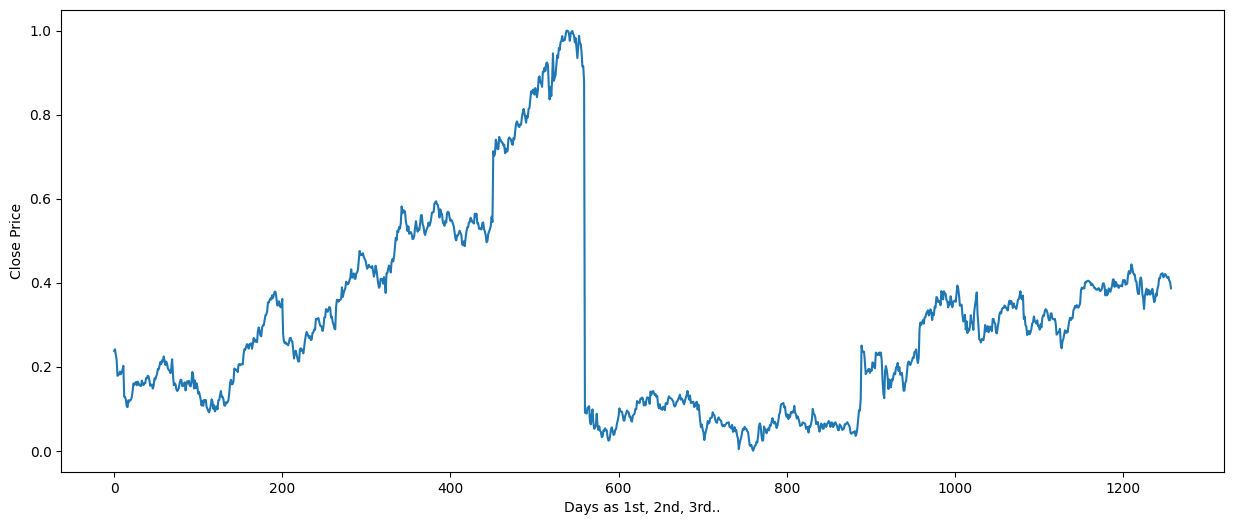

In [14]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
#plt.ylabel("Open Price")
plt.ylabel("Close Price")
plt.show()

In [15]:
# Creating X_train and y_train from Train data
X_train = []
y_train = []

time_step = 2

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train before reshape : (879, 2)
Shape of y_train before reshape : (879,)
Shape of X_train after reshape : (879, 2, 1)
Shape of y_train after reshape : (879, 1)


In [16]:
# Creating X_val and y_val from val data
X_val = []
y_val = []

time_step = 2

for i in range(time_step, length_validation):
    X_val.append(dataset_val_scaled[i-time_step:i,0])
    y_val.append(dataset_val_scaled[i,0])
    
# convert list to array
X_val, y_val = np.array(X_val), np.array(y_val)

print("Shape of X_val before reshape :",X_val.shape)
print("Shape of y_val before reshape :",y_val.shape)

#Reshaping
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
y_val = np.reshape(y_val, (y_val.shape[0],1))

print("Shape of X_val after reshape :",X_val.shape)
print("Shape of y_val after reshape :",y_val.shape)

Shape of X_val before reshape : (375, 2)
Shape of y_val before reshape : (375,)
Shape of X_val after reshape : (375, 2, 1)
Shape of y_val after reshape : (375, 1)


In [17]:
# Creating X_test and y_test from test data
X_test = []
y_test = []

time_step = 2
length_test = len(data_test)
for i in range(time_step, length_test):
    X_test.append(dataset_test_scaled[i-time_step:i,0])
    y_test.append(dataset_test_scaled[i,0])
    
# convert list to array
X_test, y_test = np.array(X_test), np.array(y_test)

print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test before reshape : (18, 2)
Shape of y_test before reshape : (18,)
Shape of X_test after reshape : (18, 2, 1)
Shape of y_test after reshape : (18, 1)


In [32]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(128,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
# model_lstm.add(Dense(32))
# add dropout layer
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100


c:\Users\princ\miniconda3\envs\stock_prediction\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0012 - loss: 0.0656  
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0027 - loss: 0.0032
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0028 - loss: 0.0016
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0030 - loss: 0.0021
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0037 - loss: 0.0024
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0025 - loss: 0.0011  
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0035 - loss: 0.0017
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 9.6774e-04 - loss: 0.0018
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0010 - loss: 0.0016    
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0030 - loss: 0.0029
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0024 - loss: 0.0034
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy:

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_model_performance(y_true, y_pred):
    """
    This function evaluates the model's performance using different metrics:
    Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).
    It also calculates the percentage of predictions within a tolerance.

    Parameters:
    y_true: Actual values (true data)
    y_pred: Predicted values from the model
    """
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    
    # Define tolerance level (e.g., within 5%)
    tolerance = 0.01

    # Calculate the percentage difference between actual and predicted values
    percentage_difference = np.abs((y_pred - y_true) / y_true)

    # Check if predictions are within the tolerance
    within_tolerance = percentage_difference < tolerance

    # Calculate accuracy as a percentage of predictions within the tolerance
    accuracy = np.mean(within_tolerance) * 100
    print(f"Accuracy (within {tolerance * 100}% tolerance): {accuracy:.2f}%")


In [34]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def evaluate_predictions(model, X_data, y_data, scaler, data_type="Train"):
    """
    This function evaluates the model predictions on either the training or validation data.

    Parameters:
    model: Trained model to predict data
    X_data: Input features (X_train or X_val)
    y_data: Actual values (y_train or y_val)
    scaler: The scaler used for inverse transformation
    data_type: String indicating whether it's "Train" or "Validation" data (default is "Train")
    """
    # Predicting the data
    predictions = model.predict(X_data)
    
    # Inverse transform the predicted and actual values
    predictions = scaler.inverse_transform(predictions)
    y_data = scaler.inverse_transform(y_data)  # Ensure actual values are also inverse transformed
    
    # Print the first 10 actual vs predicted values for debugging
    for actual, predicted in zip(y_data[:10], predictions[:10]):
        print(f"Actual: {actual}, Predicted: {predicted}")
    
    # Plotting the predictions vs actual values
    plt.subplots(figsize=(30, 12))
    plt.plot(predictions, label=f"y_pred_of_{data_type.lower()}", color="orange")
    plt.plot(y_data, label=f"y_{data_type.lower()}", color="g")
    plt.xlabel("Days")
    plt.ylabel("Open price")
    plt.title(f"LSTM model, Predictions with input X_{data_type.lower()} vs y_{data_type.lower()}")
    plt.legend()
    plt.show()
    
    # Evaluate the model performance
    evaluate_model_performance(y_data, predictions)


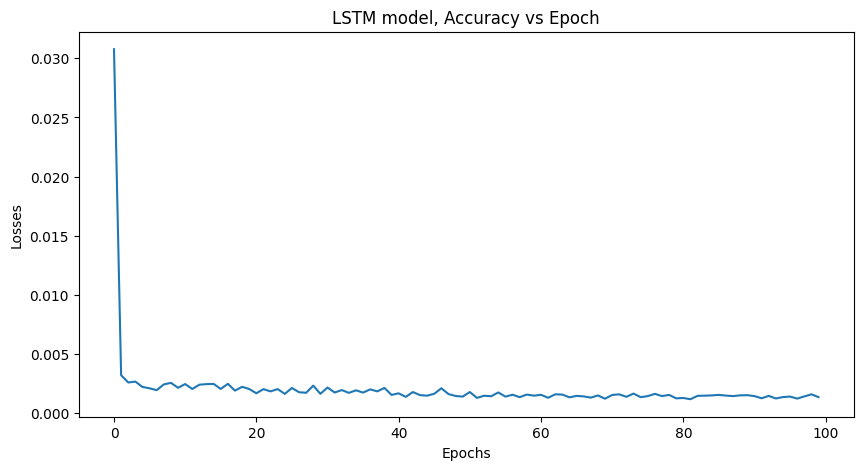

In [35]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Actual: [797.47149856], Predicted: [797.71716]
Actual: [796.85922495], Predicted: [797.3118]
Actual: [794.9834971], Predicted: [796.7714]
Actual: [795.02922991], Predicted: [795.3528]
Actual: [795.22171727], Predicted: [795.03516]
Actual: [795.47222386], Predicted: [795.1762]
Actual: [795.15550708], Predicted: [795.3862]
Actual: [795.39987046], Predicted: [795.21747]
Actual: [795.6947447], Predicted: [795.32336]
Actual: [796.14797734], Predicted: [795.5742]


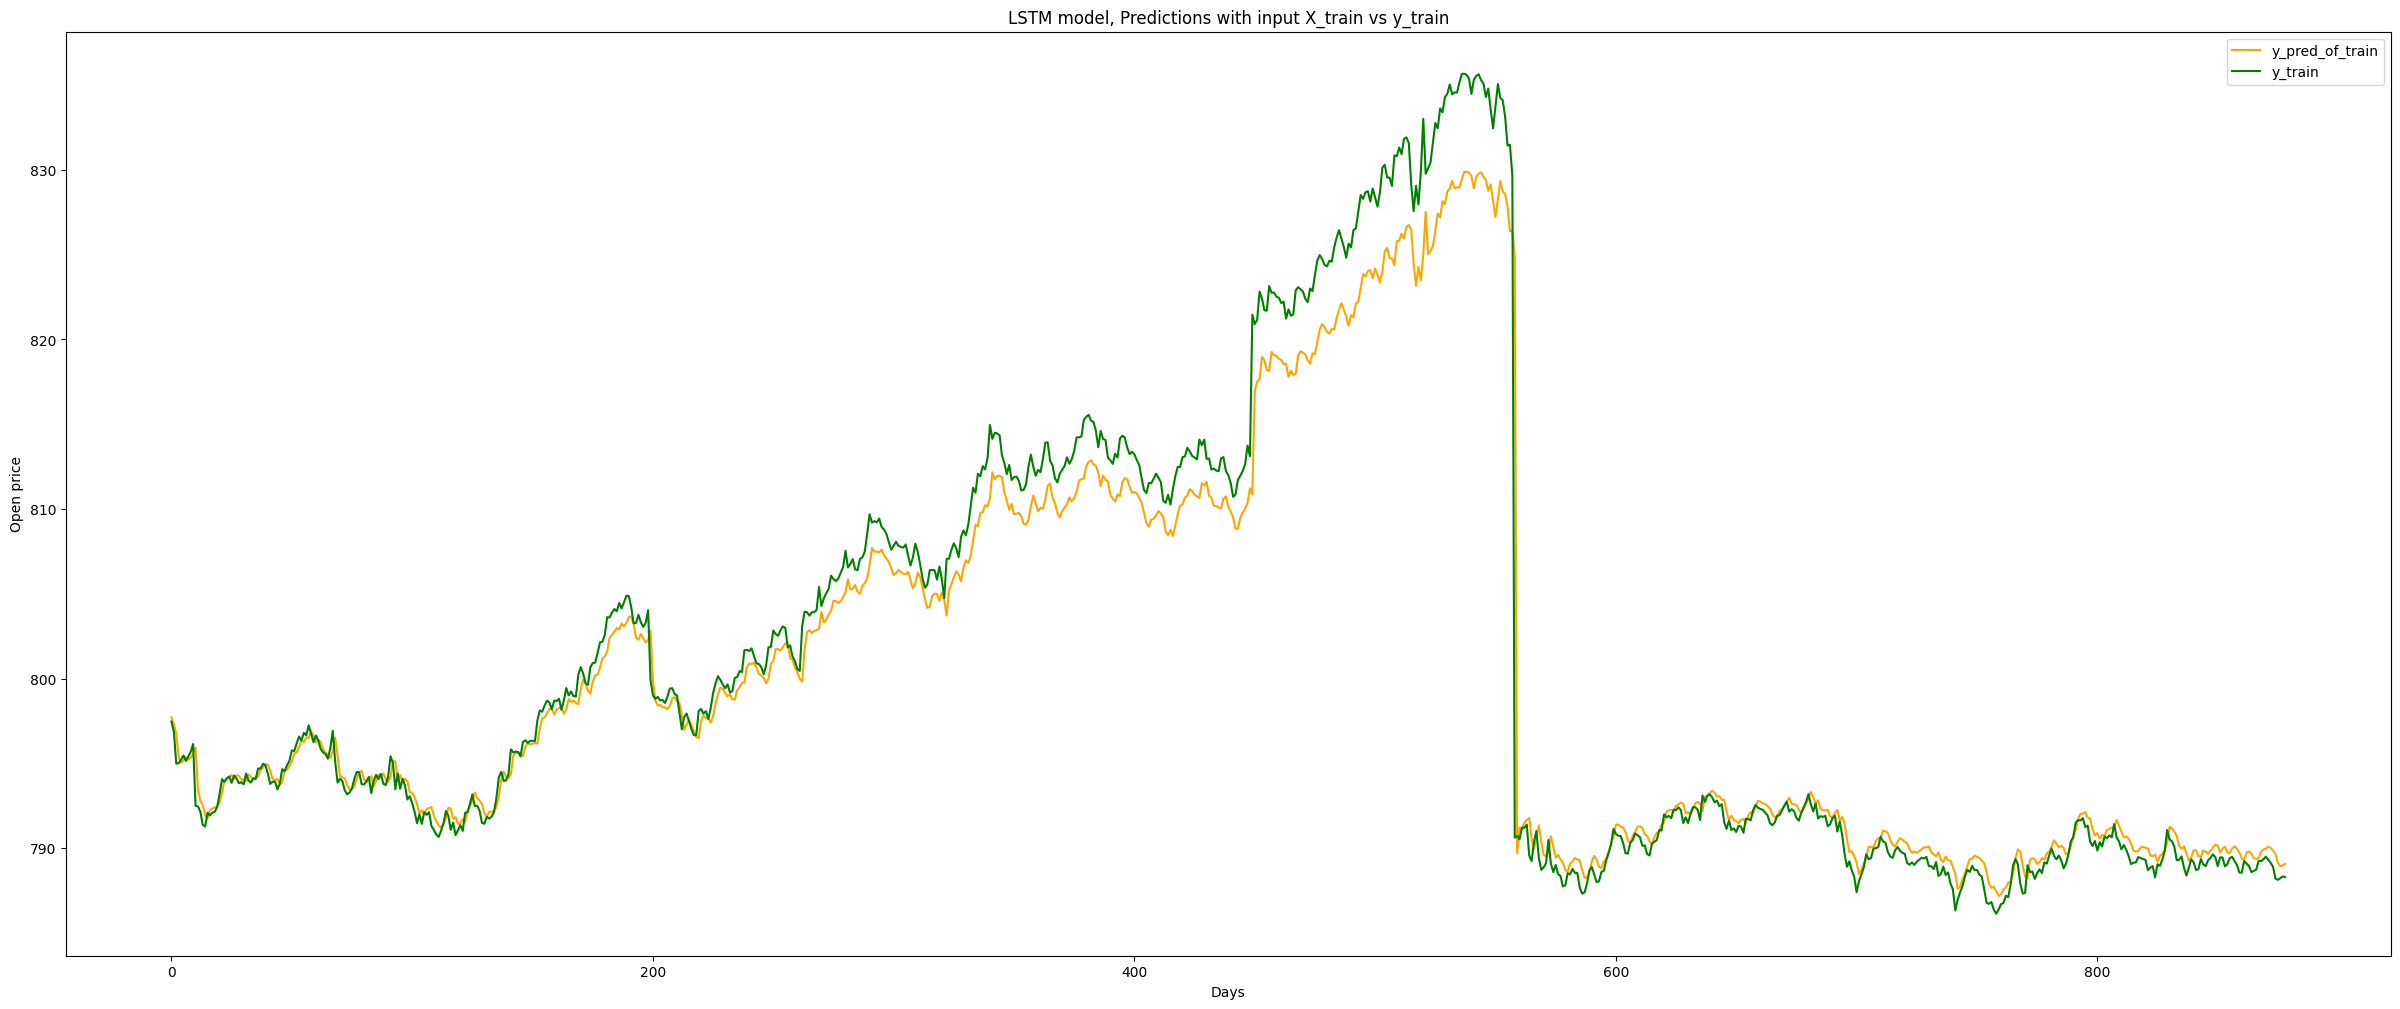

Mean Squared Error (MSE): 5.7295276480497686
Mean Absolute Error (MAE): 1.480124394952023
Root Mean Squared Error (RMSE): 2.393643174754702
Accuracy (within 1.0% tolerance): 99.77%


In [36]:
evaluate_predictions(model_lstm, X_train, y_train, scaler, data_type="Train")


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Actual: [786.78361584], Predicted: [787.45844]
Actual: [788.36340016], Predicted: [787.5484]
Actual: [791.10837991], Predicted: [788.7347]
Actual: [793.54074625], Predicted: [790.9188]
Actual: [793.39363406], Predicted: [793.1894]
Actual: [796.67523896], Predicted: [793.62726]
Actual: [812.23569664], Predicted: [795.80994]
Actual: [810.57901276], Predicted: [806.8804]
Actual: [810.45864824], Predicted: [808.7981]
Actual: [810.42521365], Predicted: [808.5294]


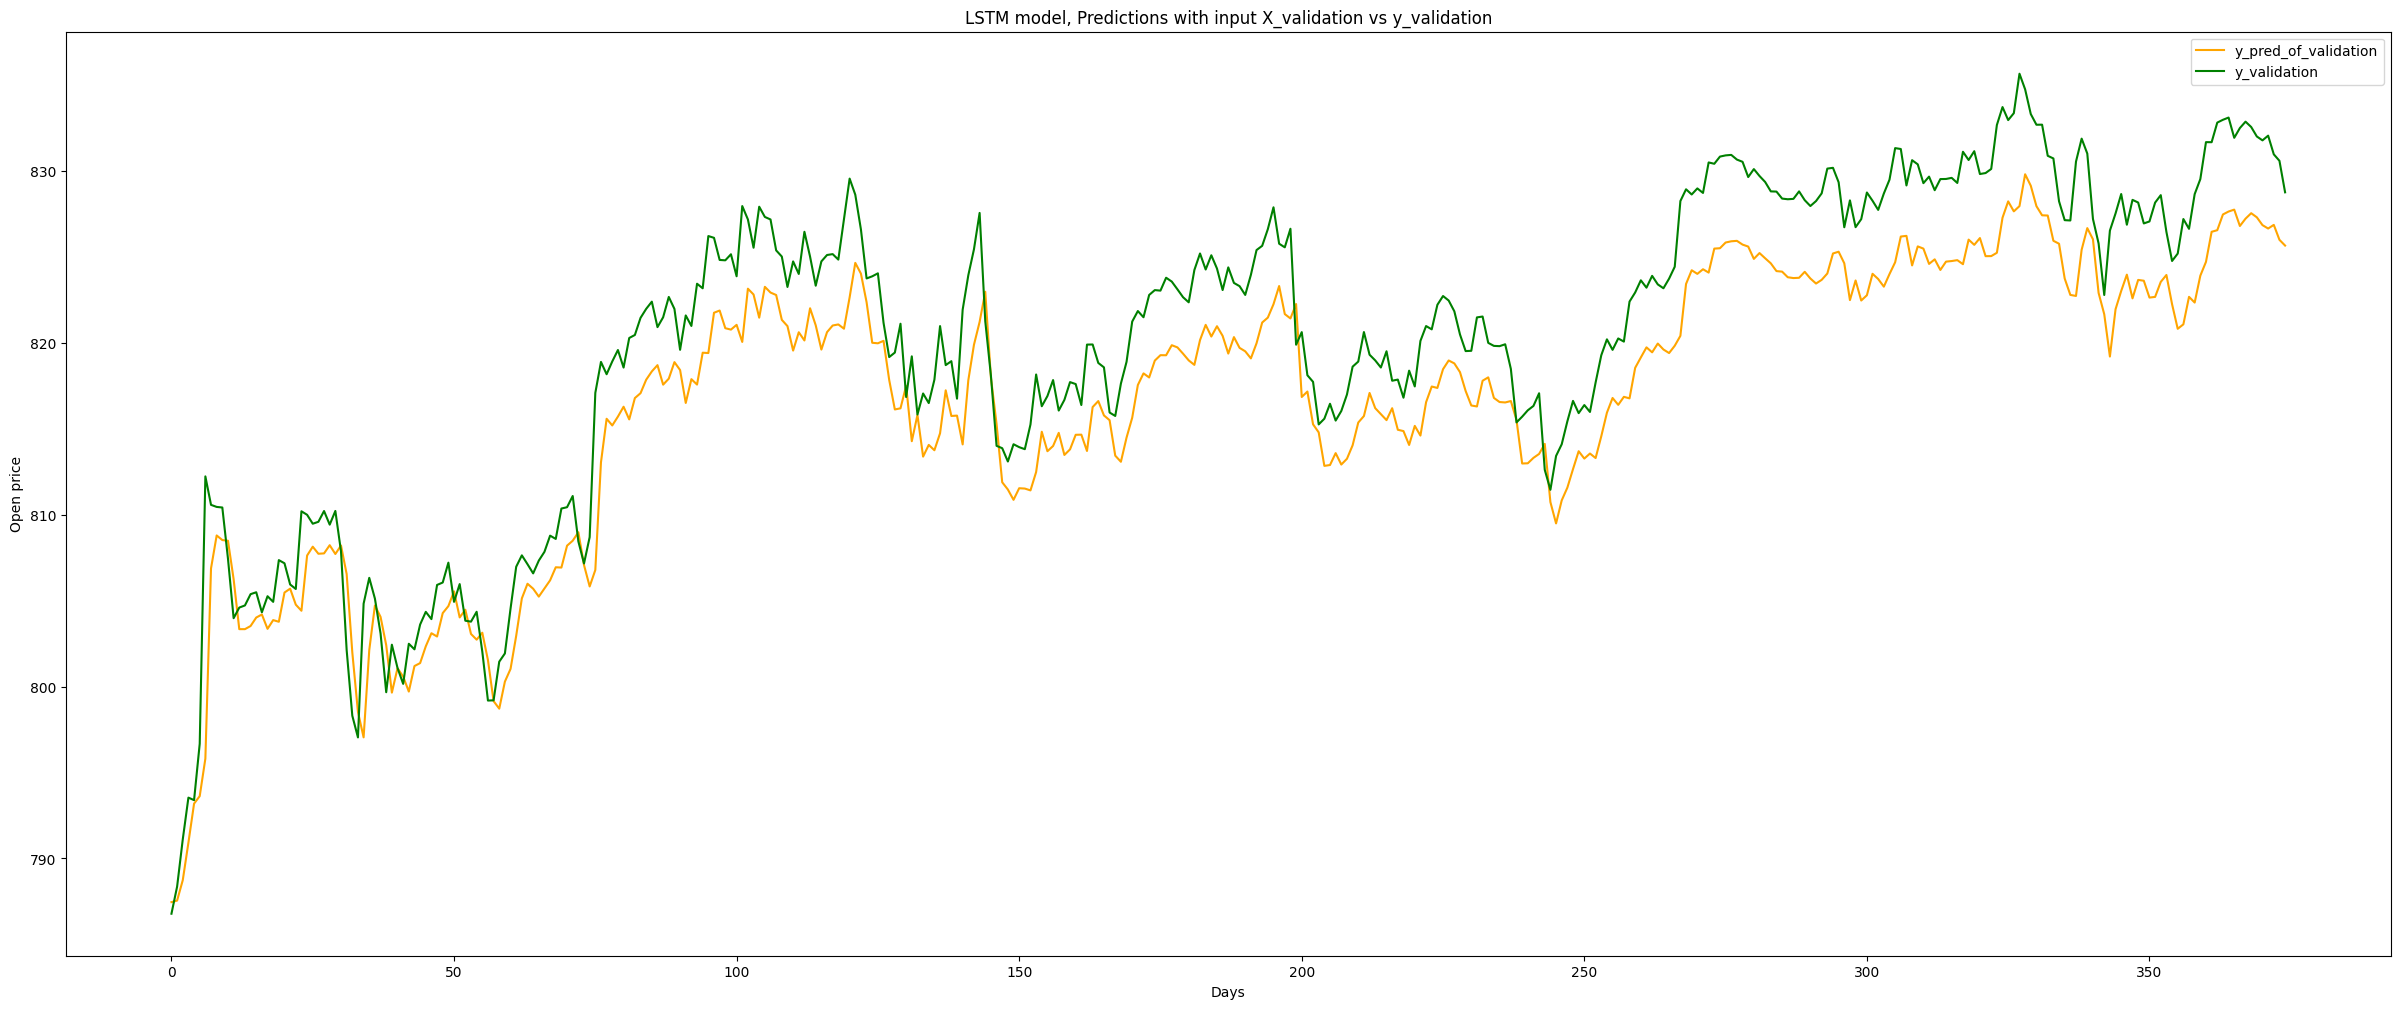

Mean Squared Error (MSE): 16.869494056105864
Mean Absolute Error (MAE): 3.6667272893224667
Root Mean Squared Error (RMSE): 4.1072489644658585
Accuracy (within 1.0% tolerance): 99.47%


In [37]:
evaluate_predictions(model_lstm, X_val, y_val, scaler, data_type="Validation")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Actual: [794.02], Predicted: [787.6238]
Actual: [806.15], Predicted: [792.3894]
Actual: [806.65], Predicted: [802.1958]
Actual: [804.79], Predicted: [805.1489]
Actual: [807.91], Predicted: [803.85345]
Actual: [806.36], Predicted: [805.8429]
Actual: [807.88], Predicted: [805.16724]
Actual: [804.61], Predicted: [806.0719]
Actual: [806.07], Predicted: [803.86084]
Actual: [802.17], Predicted: [804.49786]


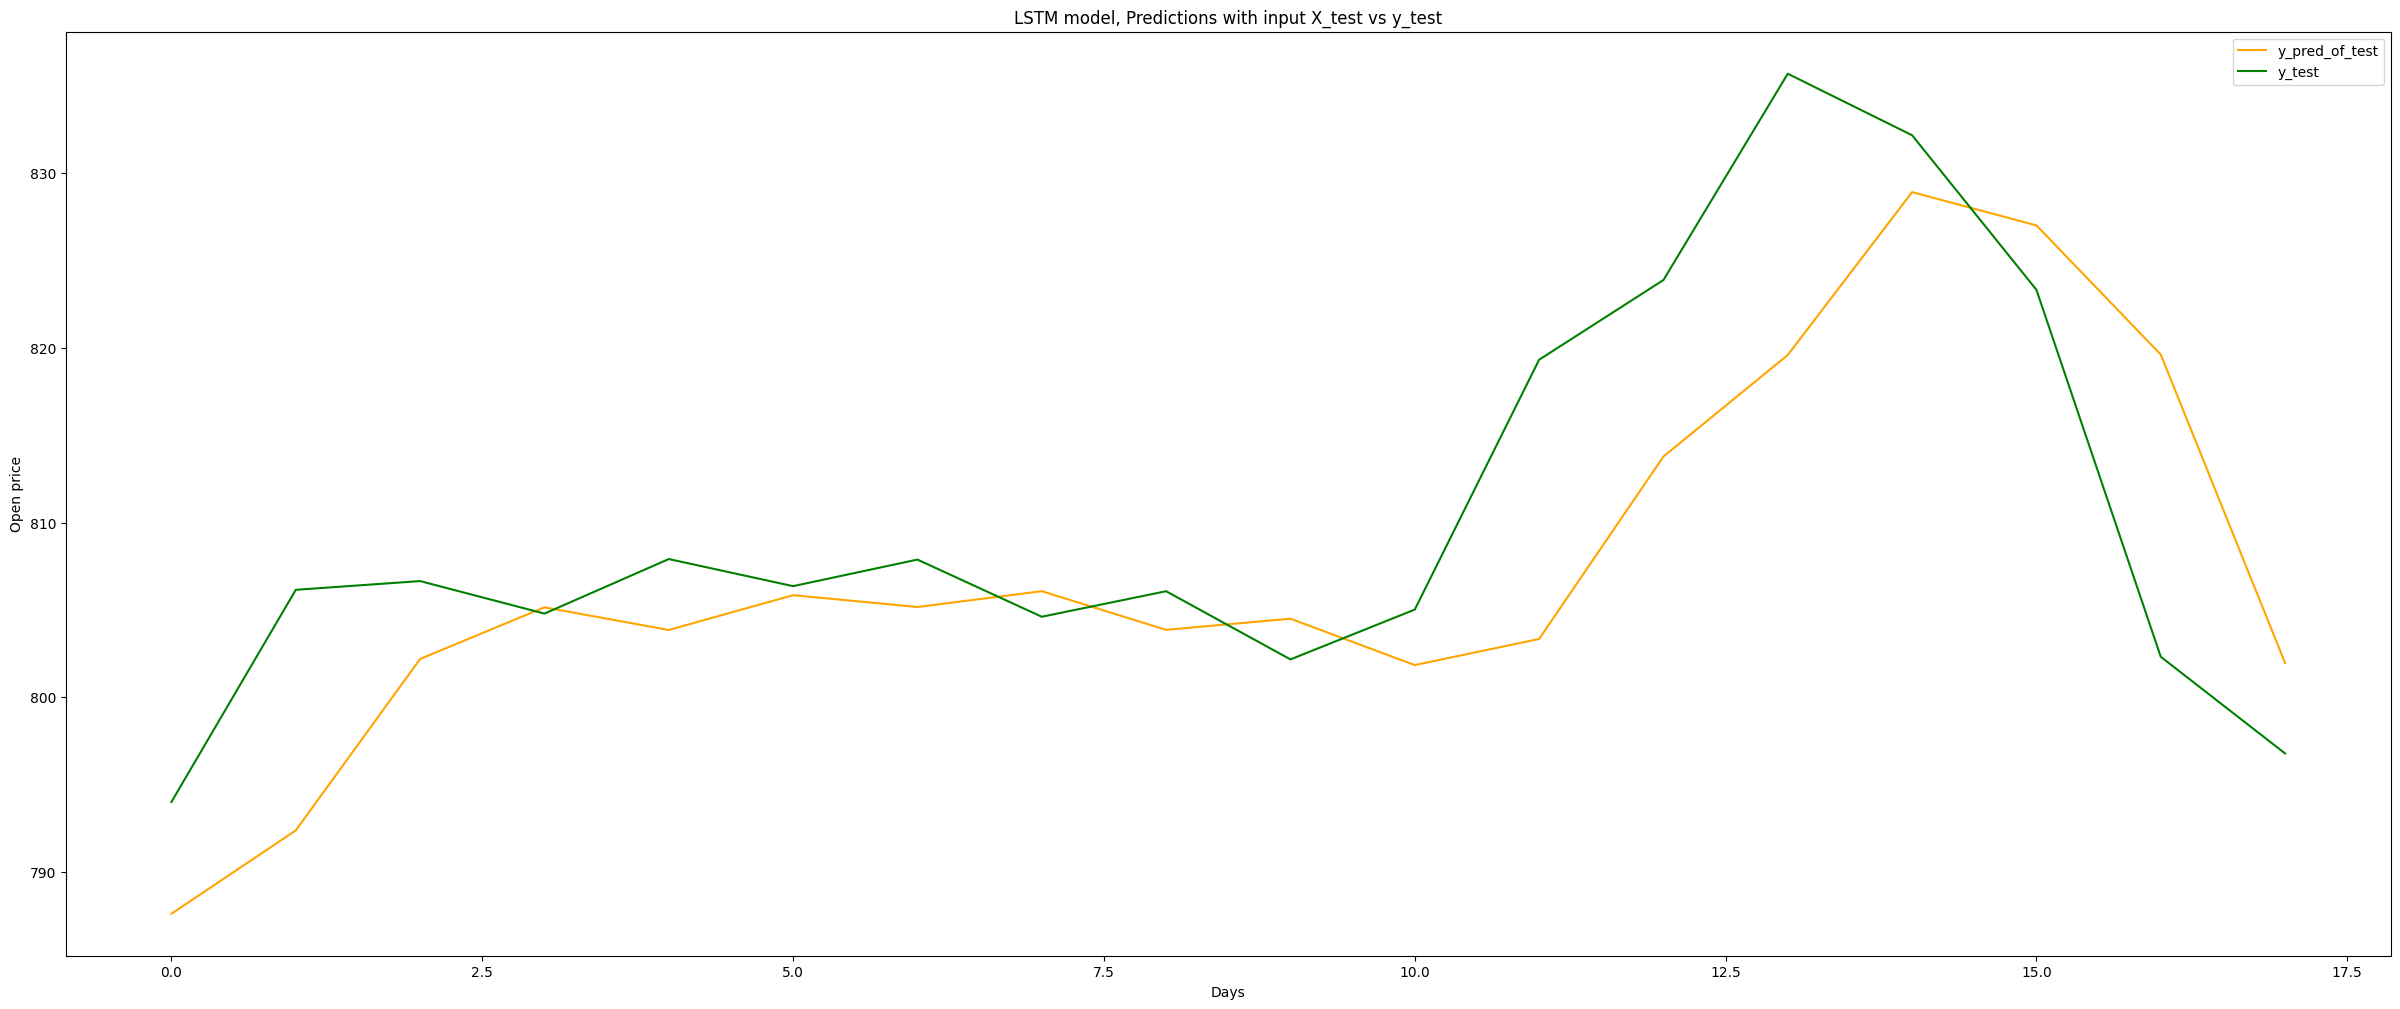

Mean Squared Error (MSE): 70.13330857042932
Mean Absolute Error (MAE): 6.276668565538191
Root Mean Squared Error (RMSE): 8.374563186843199
Accuracy (within 1.0% tolerance): 72.22%


In [38]:
evaluate_predictions(model_lstm, X_test, y_test, scaler, data_type="Test")